<a href="https://colab.research.google.com/github/polock11/vw_used_car_analysis/blob/main/eda_vw_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA on VW dataset
* The primary goal is to understand the dataset and find relation between features through exploratory data analysis.

In [2]:
#libraries for manipulating the dataset
import pandas as pd
import numpy as np

#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("vw.csv")
df.head(10)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5
5,T-Roc,2020,31895,Manual,10,Petrol,42.2,1.5
6,T-Roc,2020,27895,Manual,10,Petrol,42.2,1.5
7,T-Roc,2020,39495,Semi-Auto,10,Petrol,32.5,2.0
8,T-Roc,2019,21995,Manual,10,Petrol,44.1,1.0
9,T-Roc,2019,23285,Manual,10,Petrol,42.2,1.5


In [3]:
display(df.info())
print("Shape", str(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


None

Shape (15157, 8)


**Observations:**

* The dataset has total 15157 entries as rows and 8 columns.
* There is a mix of int, float and object type data in the feature variables
* No null value is present


---
**Feature Explanation:**

* **model**: Name of the car models
* **year**: Release year of the model
* **price**: sell value after the first hand use
* **transmission**: Release year of the model
* **mileage**: Total miles count till the date of second hand sell
* **fuelType**: Type of fuel for the engine
* **mpg**: mileage per galon
* **engineSize**: size of the engine

Target Variable: **price**

N.B: Resel price of the used cars


---
**Data Types:**

Total 3 types of data can be seen. Which are

* **object (3)**: model, transmission, fuelType
* **int64 (3)**: year, price, mileage
* **float64 (2)**: mpg, engineSize



In [4]:
display(df.describe())
display(df.describe(include = 'O'))

,year,price,mileage,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,188.300000,3.200000


,model,transmission,fuelType
count,15157,15157,15157
unique,27,3,4
top,Golf,Manual,Petrol
freq,4863,9417,8553


**Observation of numeric features:**

* Newest model is from 2020 and Oldest model is from 2000
* price range is from USD 899 to USD 69994
* mileage varied from 1 (needs further investigation) to 212000 miles
* mpg from 0 (needs further investigation) to 188.30
* engineSize ranged between 0 (needs further      investigation) to 3.20 m/g

---

**Observation of categorical features:**
* Total 27 unique models are present in the dataset where the model **Golf** has the highest frequency
* 3 types of transmission can be found with Manual type having max count
* There are 4 types of fuel used in the cars and Petrol used most often

#Data Analysis With Different Visual Plots

In [5]:
def barplot_data(col):

    '''
        This function returns 3 plots of the perceatang, average selling price and total
        selling price based on categorical features 
    '''
    
    #grouping by a column and counting the sum, averae and frequency of ecah model 
    data = df.groupby(col)[['price']].agg(['sum','mean', 'count'])

    #resetting the index
    data = data.reset_index()

    #sorting the count in descending order
    data = data.sort_values(by = ('price', 'count'), ascending = False)

    #converting total sold price of echa cars in million
    data[('price', 'sum')] = data[('price', 'sum')]/1000000

    #counting the percentage of each model
    data[('price', 'count')] = ((data[('price', 'count')]/df.shape[0]) * 100).round(2)

    #display(data)

    plt.figure(figsize = (20,8))
    sns.set_context('talk')
    sns.set_style('darkgrid')

    #percentage plot
    plt.subplot(1,3,1)
    sns.barplot(y = col, x = ('price', 'count' ), data = data, orient = 'h', color='green', alpha = .75)
    plt.title('Percetage of cars by '+ str(col))
    plt.xlabel('% of cars')
    plt.ylabel(str(col))

    #average price plot
    plt.subplot(1,3,2)
    sns.barplot(y = col, x = ('price', 'mean' ), data = data, orient = 'h', color='blue', alpha = .75)
    plt.title('Average selling price of cars by '+ str(col))
    plt.xlabel('Average selling price ($)')
    plt.ylabel('')
    
    #total price plot
    plt.subplot(1,3,3)
    sns.barplot(y = col, x = ('price', 'sum' ), data = data, orient = 'h', color='red', alpha = .75)
    plt.title('Total selling price of cars by '+ str(col))
    plt.xlabel('Total selling price ($)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

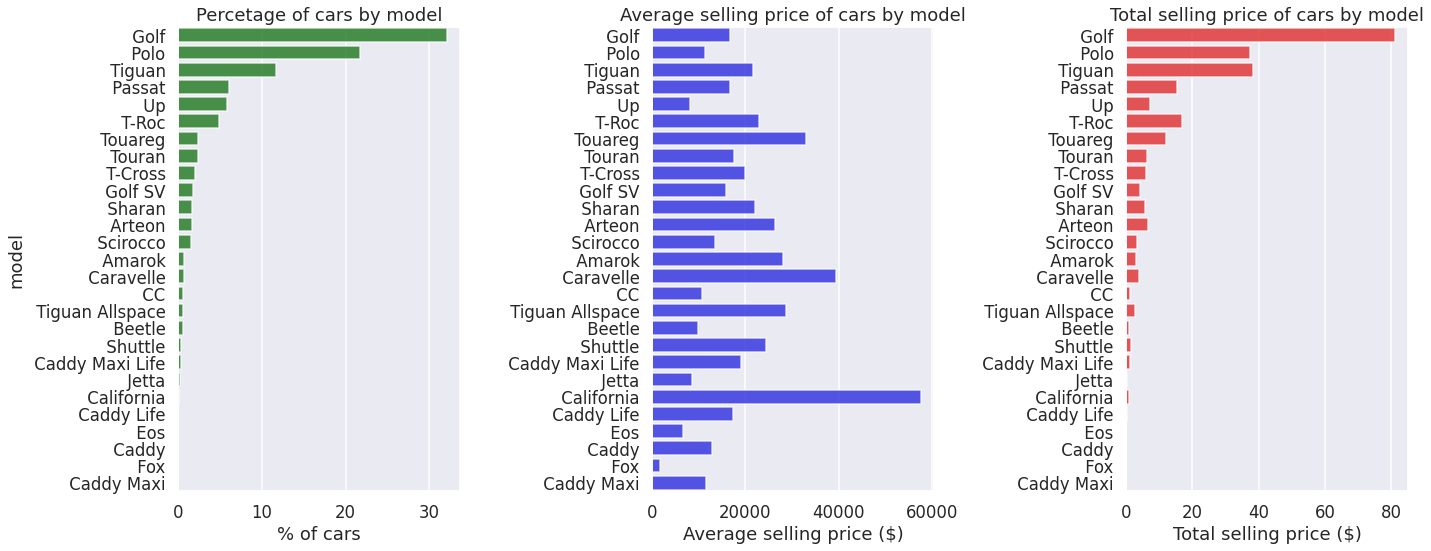

In [6]:
barplot_data('model')

<h2><b>Observations:</b></h2>

* Golf, Polo, Tiguan are the most sold cars
* The model California has the highest average re-selling price of \$57000, Amarok is the in second position resold for \$38000, T-Roc is priced at \$22000 and Fox has the lowest price approximately \$1200 
* Top 3 total selling prices are Golf (\$81M),Tiguan (\$39M), Polo (\$38M) 

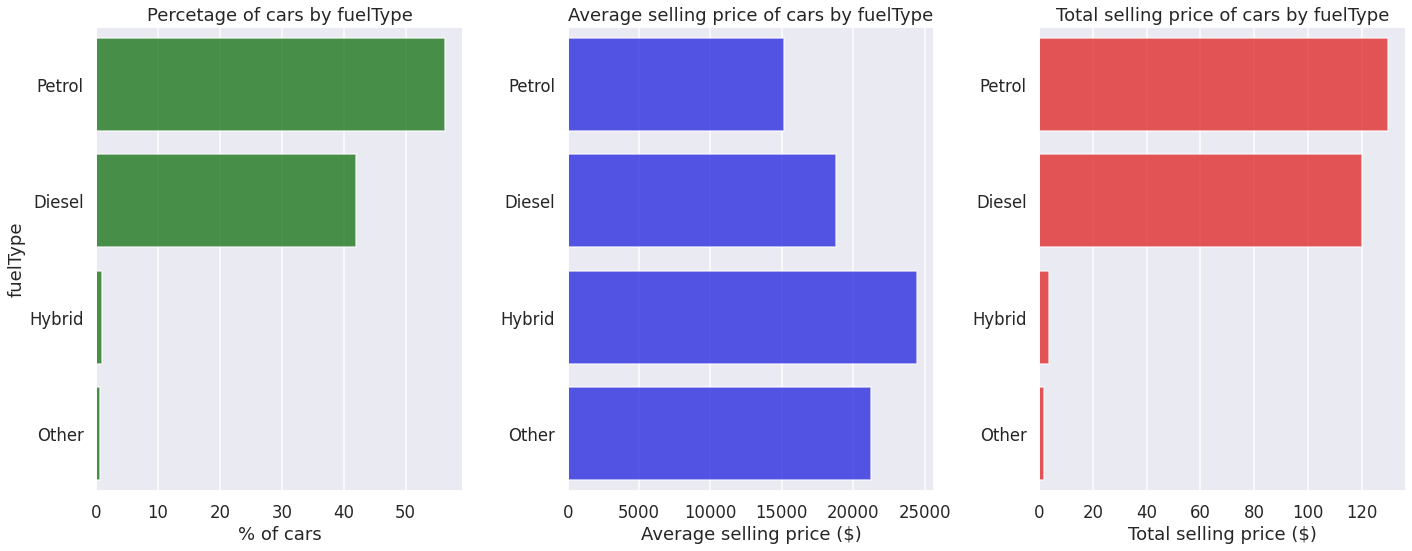

In [7]:
barplot_data('fuelType')

<h2><b>Observations:</b></h2>

* Most of the cars use Petrol (55%) and Diesel (43%)
* Hybrod cars has the highest selling price which is close to \$23500
* Petrol and Diesel based cars are more famous than hybrid and other type cars

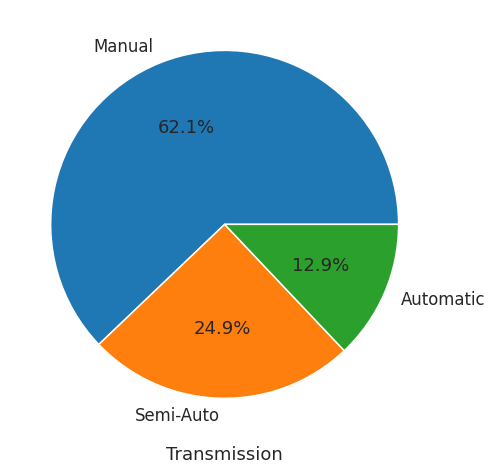

In [33]:
plt.figure(figsize = (10,8))
df['transmission'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel("")
plt.xlabel("Transmission")
plt.show()

<h2><b>Observations:</b></h2>

* Cars with manual transmission are mostly in the dataset

In [22]:
def scatter_line(var):
    '''
        This function returns 3 scatter plots of the price vs given numeric feature 
        with 'fuelType' and 'transmission' as hue
    '''
    
    plt.figure(figsize = (22,6))
    sns.set_style('darkgrid')
    #plotting var vs price scatter plot with fuelType as hue
    plt.subplot(1,2,1)
    sns.scatterplot(y = 'price', x = var, data = df, hue = 'fuelType')
    plt.title(var+' vs. price base on fuellType')

    #plotting var vs price scatter plot with transmission as hue
    plt.subplot(1,2,2)
    sns.scatterplot(y = 'price', x = var, data = df, hue = 'transmission')
    plt.title(var+' vs. price base on transmission')

    #plotting with the regression line
    plt.figure(figsize = (20,6))
    sns.regplot(x = var, y = 'price', data = df, line_kws = {"color" : "red"}, scatter_kws = {"edgecolor" : "white"})
    plt.title(var+' vs. price trend line')

    plt.tight_layout()
    plt.show()

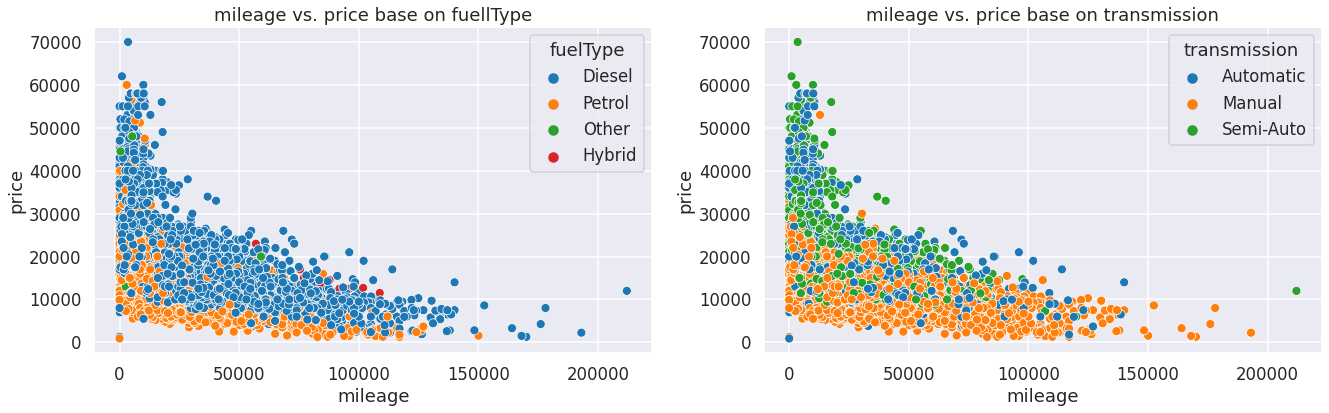

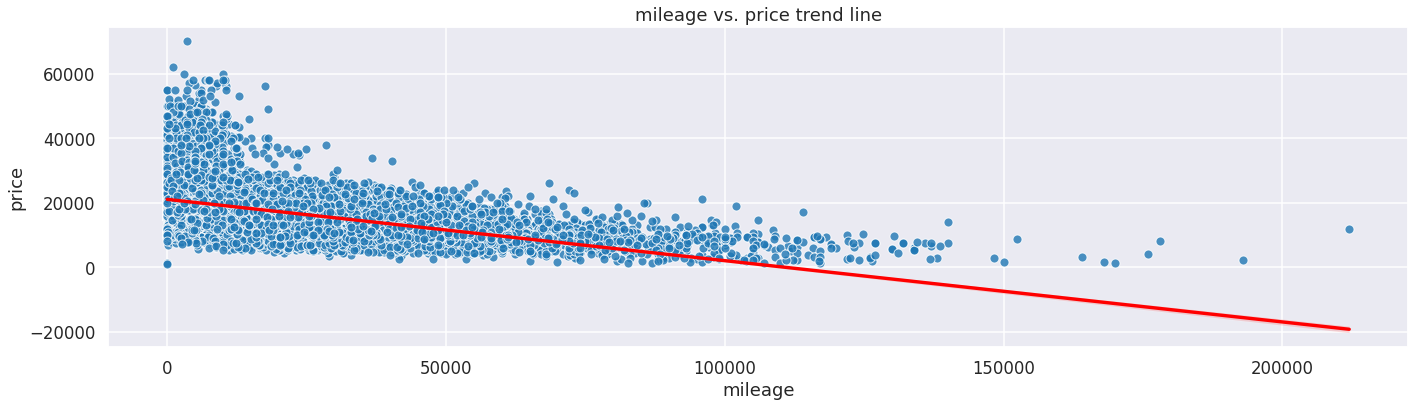

In [23]:
scatter_line('mileage')

<h2><b>Observations:</b></h2>

* For all types of fuel, price is decreasing as the mileage increases
* For all types of transmission, price is decreasing as the mileage increases 
* Overall a negative trend can be seen between price and mileage

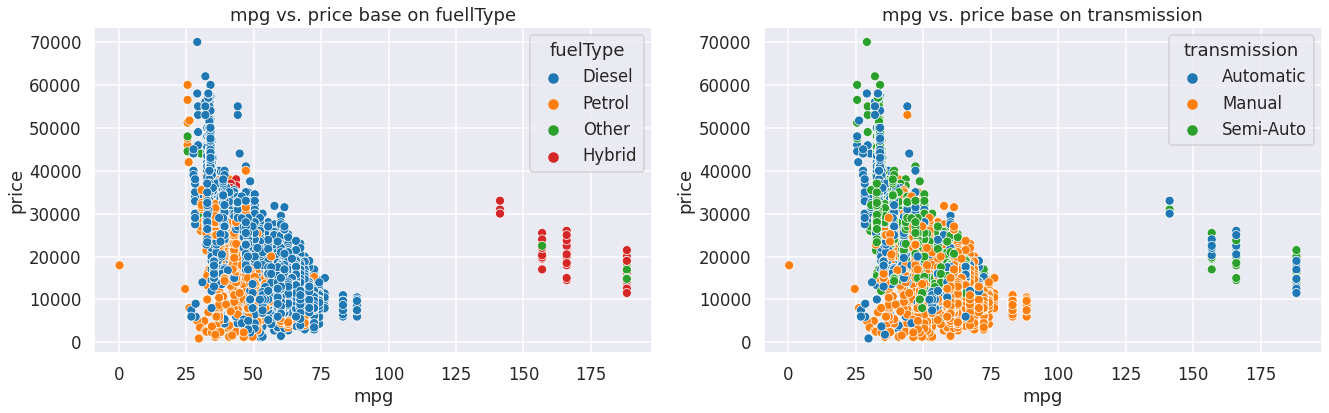

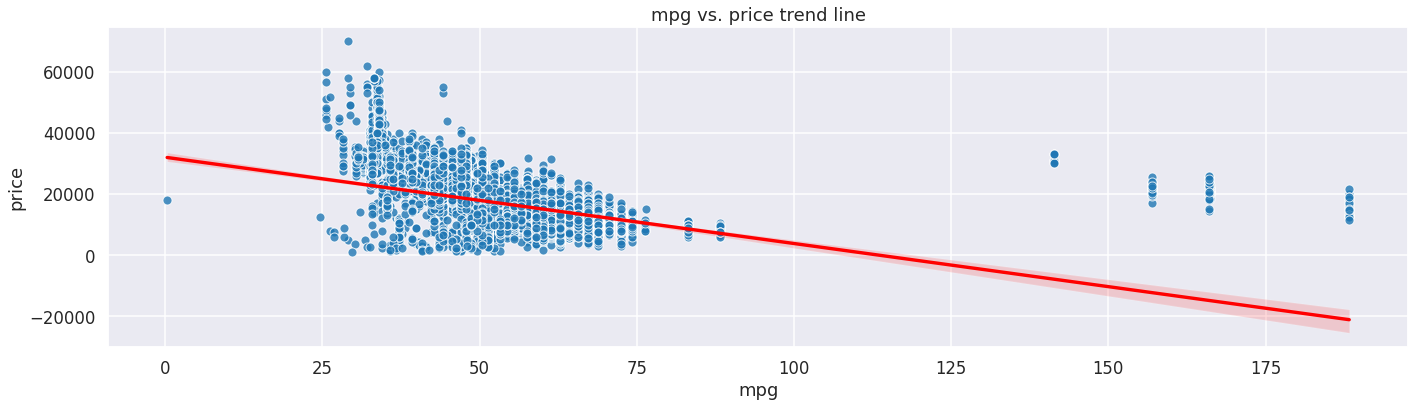

In [24]:
scatter_line('mpg')

<h2><b>Observations:</b></h2>

* Hybrid cars has the most mpg and, Diesel cars has more mpg than Petrol cars
* As mpg increses price of both petrol and diesel cars decreases
* Cars with Manual transmission has relatively more mpg than Auto and Semi-Auto cars, but very few Auto and Semi-Auto has more mpg the Manual cars.
* Overall a negative trend can be seen between price and mpg

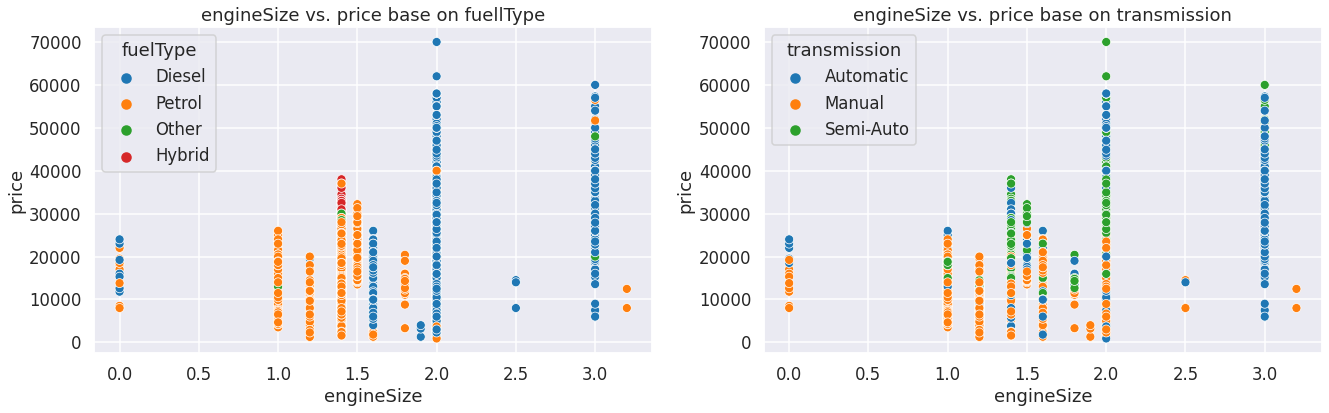

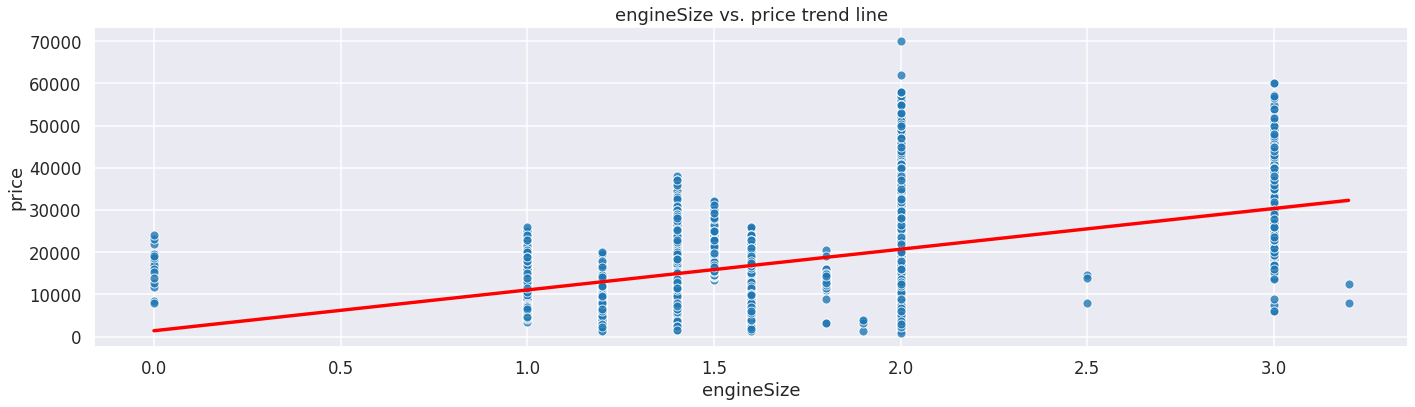

In [25]:
scatter_line('engineSize')

<h2><b>Observations:</b></h2>

* Diesel car engines are bigger than Pertrol car engines and Automatic car types engines are the biggest 
* Petrol cars have mostly manual transmission and Diesel cars have mostly Automatic transmission
* Overall a positive trend can be seen between price and engineSize

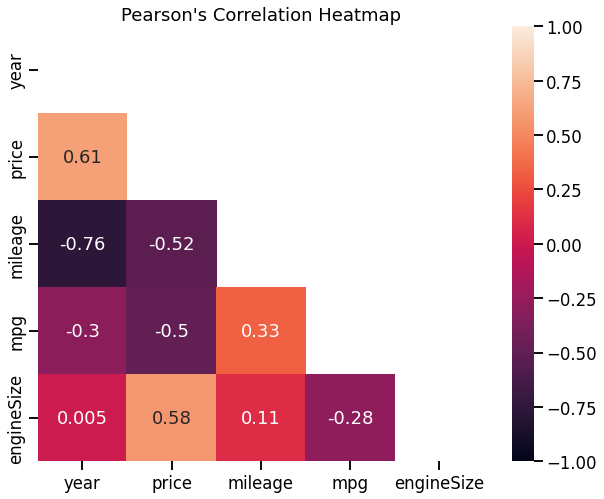

In [18]:
plt.figure(figsize = (10,8))
sns.set_context('talk')

correlation = df.corr()
correlation

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, mask = mask, annot = True, vmax = 1, vmin = -1)
plt.title('Pearson\'s Correlation Heatmap')
plt.show()

<h2><b>Observations:</b></h2>

* **price vs. year:** positive correlation refers that latest models has more resell value than the oldest models  
* **engineSize vs. price:** positive correlation refers that price increases as the size of engine increases
* **mpg vs. mileage:** positive correlation refers that cars with good mpg was used for a long time by the first users
* **mileage vs. year:** negative correlation refers that recent models are being used for a short times
* **mpg vs. price:** negative correlation refers as the price increases, mpg decreases



#Distribution Of Numeric Data

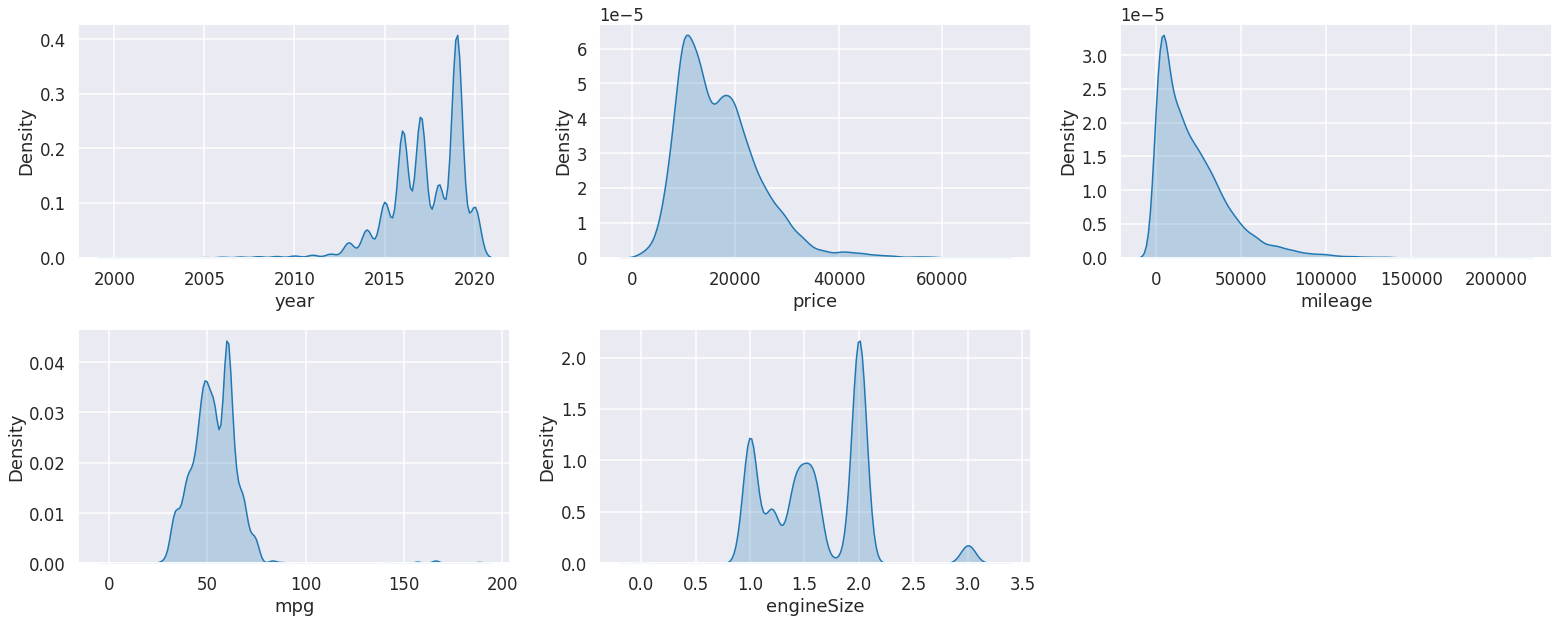

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize = (22, 9))
numeric_data = []

for col in df.columns:
    if df[col].dtypes != 'O':
        numeric_data.append(col)


for var in range(len(numeric_data)):
    
    plt.subplot(2,3, var+1)
    sns.kdeplot(x = numeric_data[var], data = df, fill = True)

plt.tight_layout()
plt.show()

<h2><b>Observations:</b></h2>

* The numeric features in the dataset are **not normally distributed**. To perform linear regression it's needed to be transformed into normal distribution.